## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Data Statistics

In [2]:
raw_data = pd.read_csv('train.csv')

In [3]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = raw_data.copy()
data = data.drop(['PassengerId',  'Name', 'Ticket'], axis=1)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [7]:
data = data.drop(['Cabin'], axis=1)

In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Exploration

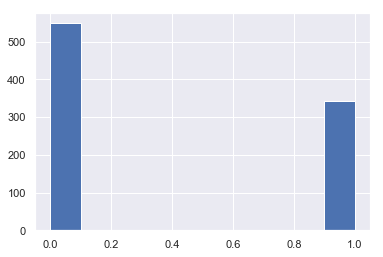

In [9]:
plt.hist(data['Survived'])
plt.show()

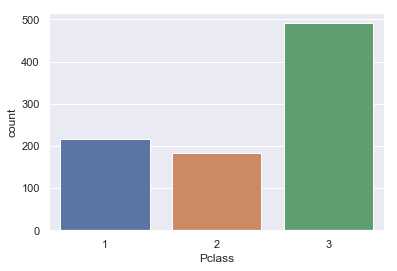

In [10]:
sns.countplot(data['Pclass'])
plt.show()

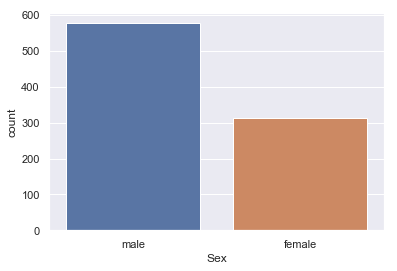

In [11]:
sns.countplot(data['Sex'])
plt.show()

C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


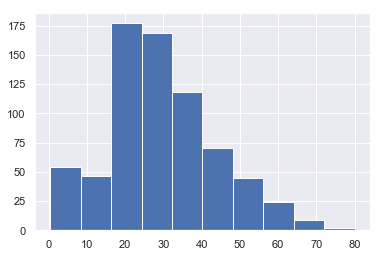

In [12]:
plt.hist(data['Age'], bins=10)
plt.show()

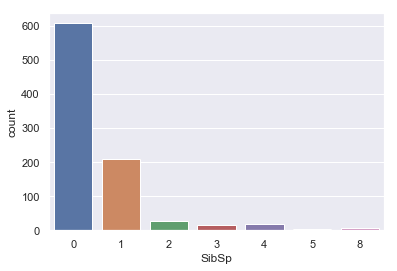

In [13]:
sns.countplot(data['SibSp'])
plt.show()

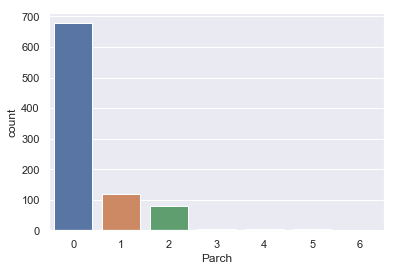

In [14]:
sns.countplot(data['Parch'])
plt.show()

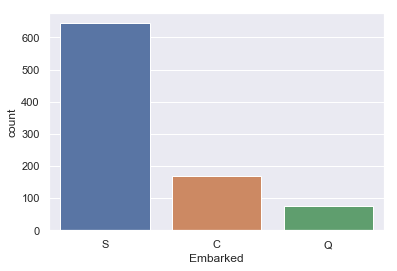

In [15]:
sns.countplot(data['Embarked'])
plt.show()

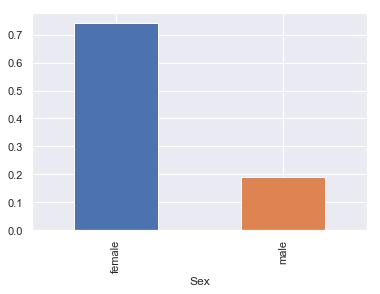

In [16]:
data[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot('bar')
plt.ylabel = "Survival Rate"
plt.show()

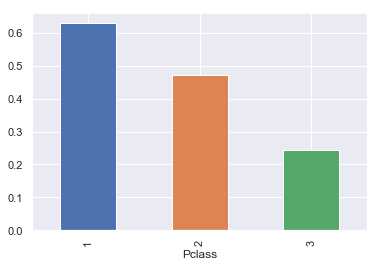

In [17]:
data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot('bar')
plt.ylabel = "Survival Rate"
plt.show()

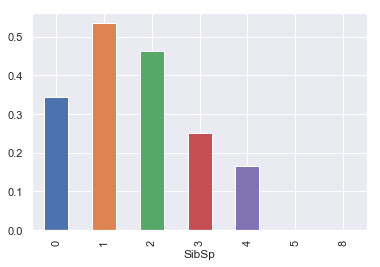

In [18]:
data[['SibSp', 'Survived']].groupby('SibSp').mean().Survived.plot('bar')
plt.ylabel = "Survival Rate"
plt.show()

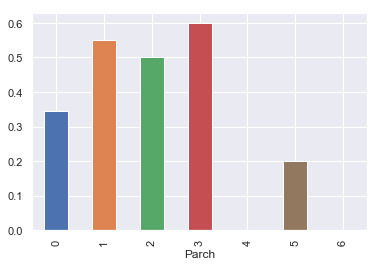

In [19]:
data[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot('bar')
plt.ylabel = "Survival Rate"
plt.show()

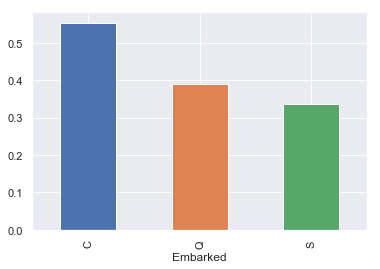

In [20]:
data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot('bar')
plt.ylabel = "Survival Rate"
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


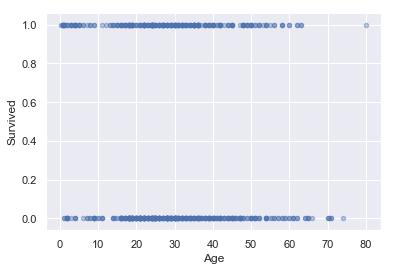

In [21]:
data.plot(kind="scatter", x='Age', y='Survived', alpha=0.4)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


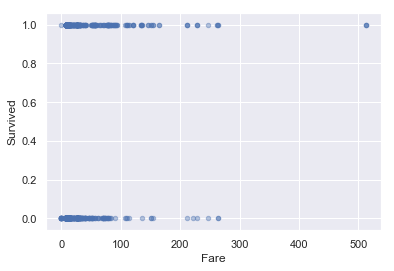

In [22]:
data.plot(kind="scatter", x="Fare", y="Survived", alpha=0.4)

In [23]:
corr_matrix = data.corr()

In [24]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

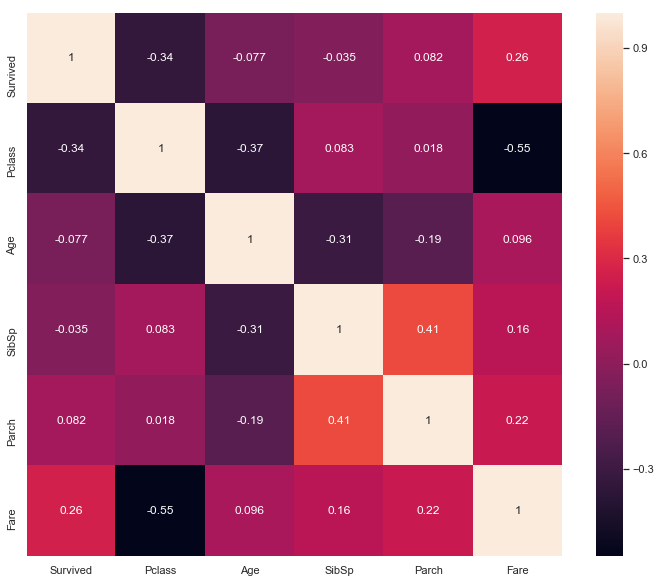

In [64]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

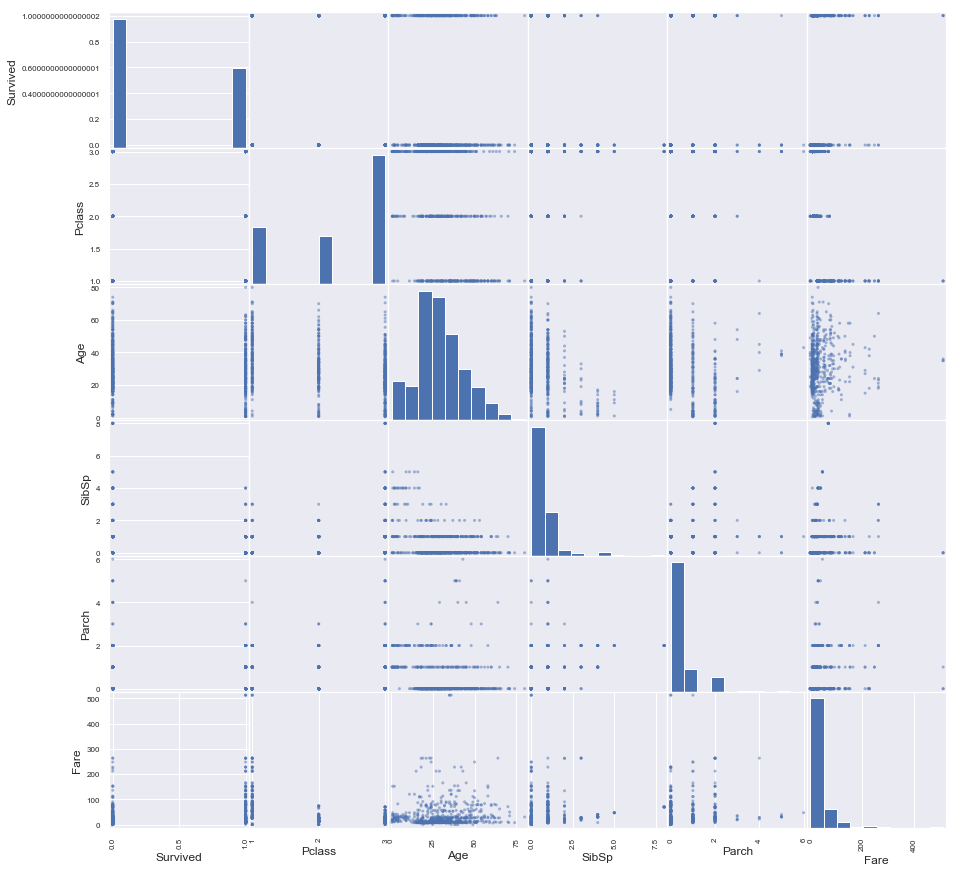

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(15, 15))
plt.show()

## Data Preprocessing

In [28]:
train_set = data.drop('Survived', axis=1)
train_labels = data['Survived']

In [29]:
train_null_values = train_set[train_set.columns[train_set.isnull().any(axis=0)]].isnull().sum()
train_null_values.sort_values(ascending=False)

Age         177
Embarked      2
dtype: int64

In [50]:
mean_age = train_set['Age'].mean()

In [55]:
train_set['Age'].fillna(mean_age, inplace=True)
train_set['Embarked'].fillna('C', inplace=True)

In [57]:
train_set['Embarked'] = train_set['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
train_set['Sex'] = train_set['Sex'].map({'male': 0, 'female': 1})

In [65]:
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2


## Model Selection

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [71]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
def score_model(model):
    scores = cross_val_score(model, train_set, train_labels,
                            scoring="accuracy", cv=10)
    display_scores(scores)

knn = KNeighborsClassifier()
score_model(knn)

Scores: [0.65555556 0.67777778 0.69662921 0.69662921 0.69662921 0.71910112
 0.7752809  0.70786517 0.65168539 0.76136364]
Mean: 0.7038517194416072
Standard deviation: 0.0381426134499078


In [73]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()
score_model(d_tree)

Scores: [0.73333333 0.77777778 0.70786517 0.79775281 0.83146067 0.76404494
 0.82022472 0.74157303 0.83146067 0.80681818]
Mean: 0.7812311315401202
Standard deviation: 0.0412928513981605


In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
score_model(forest)

Scores: [0.75555556 0.72222222 0.74157303 0.80898876 0.87640449 0.84269663
 0.80898876 0.7752809  0.7752809  0.82954545]
Mean: 0.79365367154693
Standard deviation: 0.045774326178412074


C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 

In [75]:
from sklearn.svm import SVC

svc = SVC()
score_model(svc)

Scores: [0.66666667 0.57777778 0.6741573  0.70786517 0.74157303 0.70786517
 0.76404494 0.70786517 0.68539326 0.77272727]
Mean: 0.7005935762115537
Standard deviation: 0.05313376708339553


C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
gnb = GaussianNB()
score_model(gnb)

Scores: [0.75555556 0.74444444 0.79775281 0.79775281 0.79775281 0.7752809
 0.79775281 0.80898876 0.76404494 0.82954545]
Mean: 0.7868871297242084
Standard deviation: 0.024939899728609143


In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()
score_model(lr)

Scores: [0.77777778 0.78888889 0.7752809  0.84269663 0.78651685 0.7752809
 0.78651685 0.7752809  0.80898876 0.82954545]
Mean: 0.7946773918964931
Standard deviation: 0.023037813756420365


C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\

In [80]:
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier()
score_model(xgb)

Scores: [0.8        0.78888889 0.7752809  0.85393258 0.86516854 0.85393258
 0.85393258 0.7752809  0.84269663 0.84090909]
Mean: 0.8250022698899103
Standard deviation: 0.03400596276455068


## Fine Tuning

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def random_search(model, param_distribs):
    rnd_search = RandomizedSearchCV(model, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='accuracy', random_state=42)
    rnd_search.fit(train_set, train_labels)
    print(rnd_search.best_params_)
    print(rnd_search.best_score_)

In [104]:
forest_param_distribs = {
        'bootstrap': ['True', 'False'],
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=1, high=100),
        'max_features': randint(low=1, high=7)
    }

random_search(forest, forest_param_distribs)

{'bootstrap': 'False', 'max_depth': 12, 'max_features': 6, 'n_estimators': 39}
0.8316498316498316


In [105]:
from sklearn.model_selection import GridSearchCV

lr_param_distribs = {
        'penalty': ['l1', 'l2'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }

grid_search = GridSearchCV(lr, lr_param_distribs, cv=5,
                           scoring='accuracy')
grid_search.fit(train_set, train_labels)

print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\

{'C': 0.1, 'penalty': 'l2'}
0.7946127946127947


C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Brenno Ribeiro\

In [110]:
from scipy.stats import uniform

xgb_param_distribs = {
      'n_estimators': randint(100, 1000),
      'learning_rate': uniform(0.01, 0.6),
      'subsample': uniform(),
      'max_depth': [3, 4, 5, 6, 7, 8, 9],
      'colsample_bytree': uniform(),
      'min_child_weight': [1, 2, 3, 4]
}

random_search(xgb, xgb_param_distribs)

{'colsample_bytree': 0.8331949117361643, 'learning_rate': 0.11401879210466324, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 661, 'subsample': 0.662522284353982}
0.8406285072951739


## Test Submission

In [111]:
test_data = pd.read_csv('test.csv')

In [112]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
test_ids = test_data['PassengerId']
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [115]:
test_data['Age'].fillna(mean_age, inplace=True)
test_data['Embarked'].fillna('C', inplace=True)

In [116]:
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [118]:
test_data.isnull().sum().any

<bound method Series.any of Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64>

In [119]:
mean_train_fare = train_set['Fare'].mean()

In [122]:
test_data['Fare'].fillna(mean_train_fare, inplace=True)

In [127]:
xgb_final = XGBClassifier(colsample_bytree=0.8331949117361643, 
                          learning_rate=0.11401879210466324, 
                          max_depth=3, 
                          min_child_weight=4, 
                          n_estimators=661, 
                          subsample=0.662522284353982)

xgb_final.fit(train_set, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8331949117361643, gamma=0,
       learning_rate=0.11401879210466324, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, n_estimators=661, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.662522284353982)

In [128]:
preds = xgb_final.predict(test_data)

In [130]:
import csv

values = []
for i in range(len(preds)):
    values.append([test_ids[i], preds[i]])

with open('submission_1', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['PassengerId', 'Survived'])
    writer.writerows(values)